In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Configuration
IMAGE_SIZE = 14  # Reduced from 28 to 14 for faster training
LATENT_DIM = 10  # Reduced from 20 to 10
HIDDEN_DIM = 200  # Reduced from 400 to 200
BATCH_SIZE = 128
NUM_EPOCHS = 100
LEARNING_RATE = 1e-3

In [16]:

# Set up the device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modify the transform to include resizing
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

# Update the dataset and dataloader
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Modify the VAE class
class VAE(nn.Module):
    def __init__(self, image_size, latent_dim, hidden_dim):
        super(VAE, self).__init__()
        self.image_size = image_size
        self.input_dim = image_size * image_size
        
        # Encoder layers
        self.fc1 = nn.Linear(self.input_dim, hidden_dim)
        self.fc21 = nn.Linear(hidden_dim, latent_dim)  # Mean of latent space
        self.fc22 = nn.Linear(hidden_dim, latent_dim)  # Log variance of latent space
        
        # Decoder layers
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, self.input_dim)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        x = x.view(-1, self.input_dim)
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Modify the loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, IMAGE_SIZE * IMAGE_SIZE), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Initialize the model and optimizer
model = VAE(IMAGE_SIZE, LATENT_DIM, HIDDEN_DIM).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Modify the train function
def train(model, optimizer, train_loader, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch}: Average loss: {train_loss / len(train_loader.dataset):.4f}')
    
    if epoch % 10 == 0:
        with torch.no_grad():
            sample = torch.randn(1, LATENT_DIM).to(device)
            img = model.decode(sample).cpu()
            img = img.view(IMAGE_SIZE, IMAGE_SIZE).numpy()
            
            plt.figure(figsize=(5, 5))
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.title(f'Generated Image at Epoch {epoch}')
            plt.show()


Epoch 1: Average loss: 55.2567
Epoch 2: Average loss: 47.3956
Epoch 3: Average loss: 46.5293
Epoch 4: Average loss: 46.1279
Epoch 5: Average loss: 45.9217
Epoch 6: Average loss: 45.7690
Epoch 7: Average loss: 45.6685
Epoch 8: Average loss: 45.5622
Epoch 9: Average loss: 45.4905
Epoch 10: Average loss: 45.4256


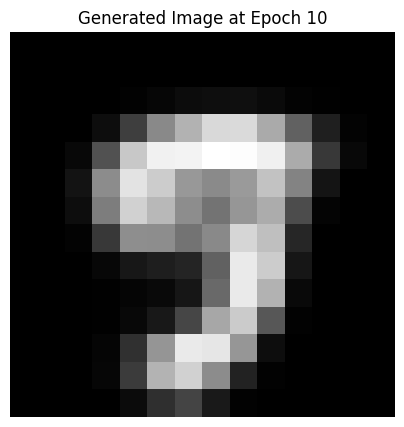

Epoch 11: Average loss: 45.3667
Epoch 12: Average loss: 45.2933
Epoch 13: Average loss: 45.2805
Epoch 14: Average loss: 45.2232
Epoch 15: Average loss: 45.1845
Epoch 16: Average loss: 45.1591
Epoch 17: Average loss: 45.1183
Epoch 18: Average loss: 45.1039
Epoch 19: Average loss: 45.0847
Epoch 20: Average loss: 45.0479


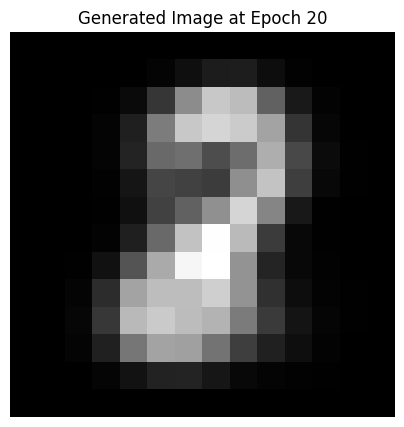

Epoch 21: Average loss: 45.0594
Epoch 22: Average loss: 45.0278
Epoch 23: Average loss: 45.0031
Epoch 24: Average loss: 44.9870
Epoch 25: Average loss: 44.9801
Epoch 26: Average loss: 44.9963
Epoch 27: Average loss: 44.9695
Epoch 28: Average loss: 44.9525
Epoch 29: Average loss: 44.9491
Epoch 30: Average loss: 44.9229


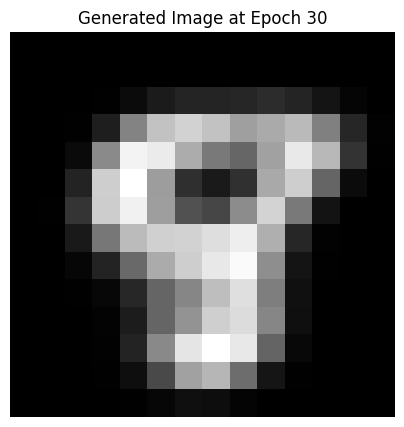

Epoch 31: Average loss: 44.9275
Epoch 32: Average loss: 44.9083
Epoch 33: Average loss: 44.9159
Epoch 34: Average loss: 44.9048
Epoch 35: Average loss: 44.8879
Epoch 36: Average loss: 44.8628
Epoch 37: Average loss: 44.8748
Epoch 38: Average loss: 44.8928
Epoch 39: Average loss: 44.8500
Epoch 40: Average loss: 44.8535


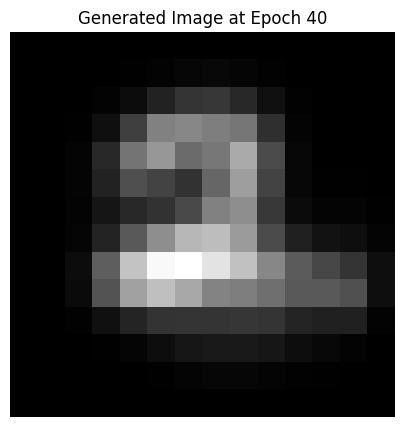

Epoch 41: Average loss: 44.8499
Epoch 42: Average loss: 44.8294
Epoch 43: Average loss: 44.8417
Epoch 44: Average loss: 44.8231
Epoch 45: Average loss: 44.8206
Epoch 46: Average loss: 44.8174
Epoch 47: Average loss: 44.8075
Epoch 48: Average loss: 44.8057
Epoch 49: Average loss: 44.8130
Epoch 50: Average loss: 44.7993


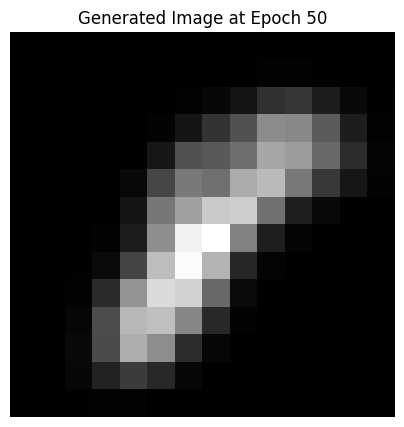

Epoch 51: Average loss: 44.7900
Epoch 52: Average loss: 44.7883
Epoch 53: Average loss: 44.7872
Epoch 54: Average loss: 44.7832
Epoch 55: Average loss: 44.7922
Epoch 56: Average loss: 44.7772
Epoch 57: Average loss: 44.7566
Epoch 58: Average loss: 44.7539
Epoch 59: Average loss: 44.7640
Epoch 60: Average loss: 44.7637


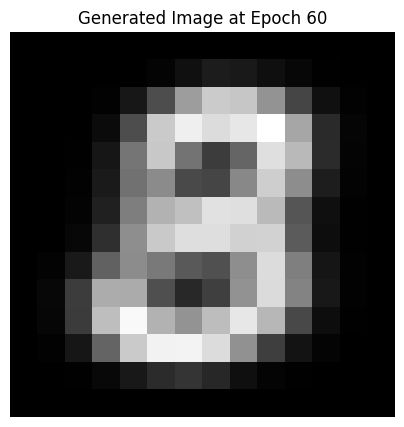

Epoch 61: Average loss: 44.7692
Epoch 62: Average loss: 44.7558
Epoch 63: Average loss: 44.7606
Epoch 64: Average loss: 44.7494
Epoch 65: Average loss: 44.7339
Epoch 66: Average loss: 44.7483
Epoch 67: Average loss: 44.7353
Epoch 68: Average loss: 44.7459
Epoch 69: Average loss: 44.7383
Epoch 70: Average loss: 44.7319


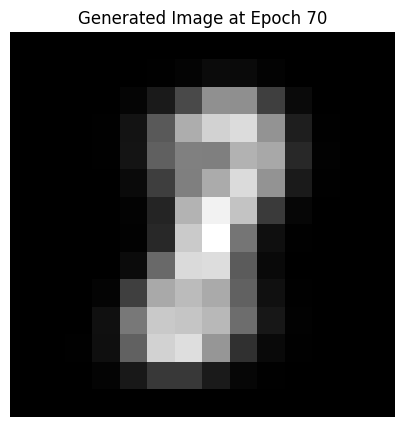

Epoch 71: Average loss: 44.7337
Epoch 72: Average loss: 44.7291
Epoch 73: Average loss: 44.7196
Epoch 74: Average loss: 44.7279
Epoch 75: Average loss: 44.7296
Epoch 76: Average loss: 44.7140
Epoch 77: Average loss: 44.7074
Epoch 78: Average loss: 44.7206
Epoch 79: Average loss: 44.7288
Epoch 80: Average loss: 44.7096


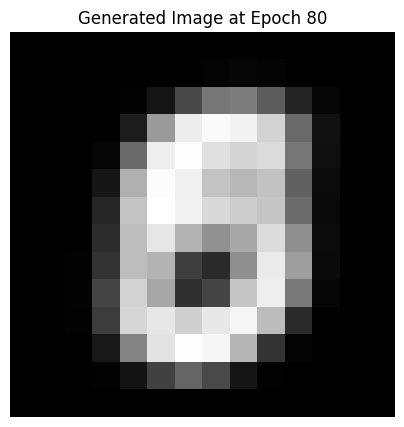

Epoch 81: Average loss: 44.7039
Epoch 82: Average loss: 44.6963
Epoch 83: Average loss: 44.7069
Epoch 84: Average loss: 44.7063
Epoch 85: Average loss: 44.6953
Epoch 86: Average loss: 44.6864
Epoch 87: Average loss: 44.6992
Epoch 88: Average loss: 44.6897
Epoch 89: Average loss: 44.6891
Epoch 90: Average loss: 44.6881


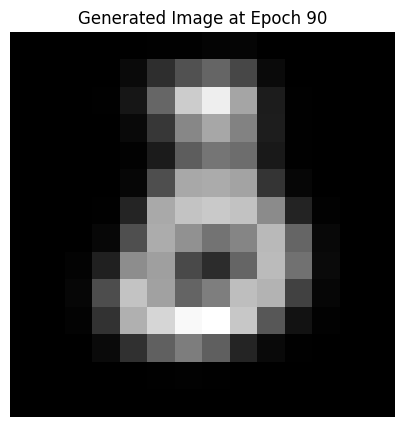

Epoch 91: Average loss: 44.7021
Epoch 92: Average loss: 44.6852
Epoch 93: Average loss: 44.6839
Epoch 94: Average loss: 44.6833
Epoch 95: Average loss: 44.6844
Epoch 96: Average loss: 44.6787
Epoch 97: Average loss: 44.6939
Epoch 98: Average loss: 44.6758
Epoch 99: Average loss: 44.6622
Epoch 100: Average loss: 44.6777


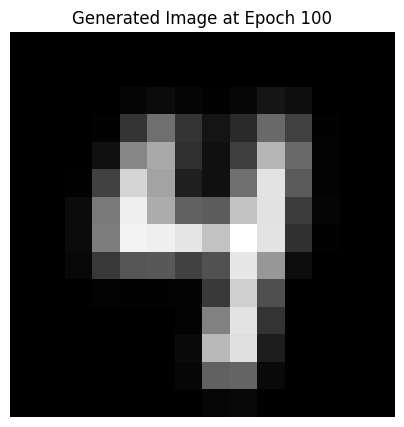

Training complete!


In [17]:
# Train the model
for epoch in range(1, NUM_EPOCHS + 1):
    train(model, optimizer, train_loader, epoch)

print("Training complete!")


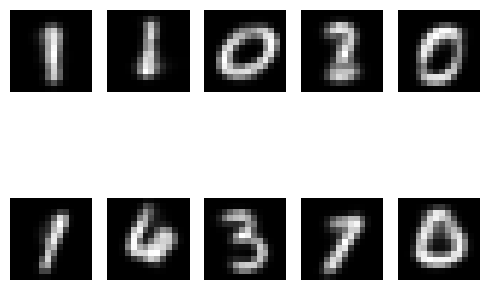

In [27]:
# Generate and display 10 images in a grid
plt.figure(figsize=(5, 5))
for i in range(10):
    with torch.no_grad():
        sample = torch.randn(1, LATENT_DIM).to(device)
        img = model.decode(sample).cpu()
        img = img.view(IMAGE_SIZE, IMAGE_SIZE).numpy()
        
        plt.subplot(2, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        # plt.title(f'Generated Image {i+1}')

plt.tight_layout()
plt.show() 